In [77]:

# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


Read Data

In [78]:

# load the data
pd.set_option('display.max_columns', None) 

In [79]:
# load the data


df_final_demo = pd.read_csv('../Data/Cleaned/df_final_demo (1).txt')
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [80]:
# check for missing values
df_final_demo[df_final_demo.isnull().any(axis=1)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [83]:
# remove the missing values
df_final_demo = df_final_demo.dropna()

In [84]:
df_final_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [85]:
# remove gendr value X
df_final_demo = df_final_demo[df_final_demo['gendr'] != 'X']
df_final_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22745
Name: count, dtype: int64

In [86]:
# sign gendr U M F to a integer value
df_final_demo['gendr'] = df_final_demo['gendr'].map({'U':0, 'M':1, 'F':2})

# change it back to U M F 
df_final_demo['gendr'] = df_final_demo['gendr'].map({0:'U', 1:'M', 2:'F'})



In [87]:
df_final_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [88]:
df_final_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059100e+04,70591.000000,70591.000000,70591.000000,70591.000000,7.059100e+04,70591.000000,70591.000000
mean,5.005066e+06,12.053109,150.661317,46.442542,2.255528,1.474518e+05,3.382457,5.566701
std,2.877324e+06,6.871976,82.091724,15.591381,0.535002,3.015160e+05,2.236601,2.353302
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,6.000000,82.000000,32.500000,2.000000,3.734846e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333689e+04,3.000000,5.000000
75%,7.483160e+06,16.000000,192.000000,59.000000,2.000000,1.375501e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [89]:
df_final_demo.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70591
bal                 70329
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

Only category is Gender

In [90]:
list(set(df_final_demo.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

### EDA about demo dataset -- univariate 

In [ ]:
# univariate analysis of the numerical columns 
df_final_demo.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)


In [ ]:
sns.histplot(df_final_demo['clnt_age'], kde=True, bins=30, color="lightblue")

In [ ]:
df_final_demo.columns

In [ ]:
# crasstab of gendr and clnt_age
pd.crosstab(df_final_demo['gendr'], df_final_demo['num_accts'], margins=True)


In [ ]:
# countplot of clnt_tenure_yr
sns.countplot(x='clnt_tenure_yr', data=df_final_demo, palette='hsv')

In [ ]:
df_final_experiment = pd.read_csv('../Data/Cleaned/df_final_experiment_clients.txt')
df_final_experiment['Variation'].value_counts()

In [ ]:
df_final_experiment

In [ ]:
# check for missing values
df_final_experiment[df_final_experiment.isnull().any(axis=1)]

In [ ]:
# pie chart to show the distribution of the variation
plt.figure(figsize=(10, 7))
df_final_experiment['Variation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Variation Distribution')
plt.show()



### Merge datasets for df_web_data

In [91]:
df_web_data1 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_1.txt')
df_web_data1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [92]:
df_web_data2 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_2.txt')
df_web_data2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [93]:
# merge the data
df_web_data = pd.concat([df_web_data1, df_web_data2])
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [94]:
# check the duplicate
df_web_data.duplicated().sum()


10764

In [95]:
# remove the duplicate
df_web_data = df_web_data.drop_duplicates()


In [96]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


# merge with variation table


In [98]:
df_final_experiment['Variation'].unique()


array(['Test', 'Control', nan], dtype=object)

In [99]:
#remove nan values
df_final_experiment = df_final_experiment.dropna()

In [102]:
#merge df_web_data and df_final_experiment
df_web_data = pd.merge(df_web_data, df_final_experiment, on='client_id', how='inner')

In [103]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


## MAP PROCESS_STEP TO A NUMBER

In [104]:

# add a new column to show the number of steps
df_web_data['num_steps'] = df_web_data['process_step'].map({'start':0, 'step_1':1, 'step_2':2, 'step_3':3, 'confirm':4})

In [105]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,3
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,2
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,3
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,2
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,3
...,...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,0
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,0
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,2
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,1


In [107]:
# df_web_date sorted by client_id and date
df_web_data = df_web_data.sort_values(by=['client_id', 'date_time'])

In [108]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps
70440,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0
70439,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1
70438,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2
70437,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3
70436,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4
...,...,...,...,...,...,...,...
273888,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2
273887,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3
273886,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4
243649,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0


## ADD THE TIME SPEND ON EACH STEP

In [110]:

# organzie the data by date_time
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])

df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4
...,...,...,...,...,...,...,...
317230,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2
317231,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3
317232,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4
317233,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0


In [149]:
#calculate the time difference by client_id
df_web_data['time_diff'] = np.where(df_web_data['visit_id'] != df_web_data['visit_id'].shift(1), 0, df_web_data.sort_values(['client_id', 'date_time']).groupby('client_id')['date_time'].diff().dt.total_seconds().fillna(0))

In [157]:
# add time spend column which is time_diff move up by one row
df_web_data['time_spend'] = df_web_data['time_diff'].shift(-1)

In [178]:
pd.set_option('display.max_rows', 120)
df_web_data[df_web_data['client_id'] == 3825423]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps,time_diff,error,time_spend
120161,3825423,378003120_6578716725,872286299_84827059427_744333,start,2017-03-29 15:24:55,Test,0,0.0,error,13.0
120162,3825423,378003120_6578716725,872286299_84827059427_744333,step_1,2017-03-29 15:25:08,Test,1,13.0,nan,39.0
120163,3825423,378003120_6578716725,872286299_84827059427_744333,step_2,2017-03-29 15:25:47,Test,2,39.0,nan,32.0
120164,3825423,378003120_6578716725,872286299_84827059427_744333,step_3,2017-03-29 15:26:19,Test,3,32.0,nan,145.0
120165,3825423,378003120_6578716725,872286299_84827059427_744333,confirm,2017-03-29 15:28:44,Test,4,145.0,nan,0.0
120166,3825423,378003120_6578716725,858718179_77342790168_664757,confirm,2017-03-30 19:24:37,Test,4,0.0,nan,494.0
120167,3825423,378003120_6578716725,858718179_77342790168_664757,confirm,2017-03-30 19:32:51,Test,4,494.0,nan,0.0
120168,3825423,378003120_6578716725,454712685_41383833331_741853,confirm,2017-04-03 19:37:56,Test,4,0.0,nan,40.0
120169,3825423,378003120_6578716725,454712685_41383833331_741853,confirm,2017-04-03 19:38:36,Test,4,40.0,nan,0.0


In [159]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps,time_diff,error,time_spend
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0,0.0,nan,7.0
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1,7.0,nan,32.0
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2,32.0,nan,99.0
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3,99.0,nan,20.0
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4,20.0,nan,0.0
...,...,...,...,...,...,...,...,...,...,...
317230,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2,10.0,nan,39.0
317231,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3,39.0,nan,21.0
317232,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4,21.0,nan,0.0
317233,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0,0.0,error,8.0


In [175]:
# filter num_steps is 4
data_confirm = df_web_data[df_web_data['num_steps'] == 4]
data_confirm['time_spend'].value_counts()


time_spend
0.0       37044
1.0         105
965.0        87
966.0        75
3.0          74
          ...  
494.0         1
2294.0        1
443.0         1
1179.0        1
2580.0        1
Name: count, Length: 802, dtype: int64

In [176]:
# check when time_spend is 494
data_confirm[data_confirm['time_spend'] == 494]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps,time_diff,error,time_spend
120166,3825423,378003120_6578716725,858718179_77342790168_664757,confirm,2017-03-30 19:24:37,Test,4,0.0,nan,494.0


In [164]:
# create a grouped bar chart to show the time spend on each step by variation
df_web_data_grouped = df_web_data.groupby(['Variation', 'num_steps'])['time_spend'].mean().reset_index()
df_web_data_grouped




,Variation,num_steps,time_spend
0,Control,0,52.031401
1,Control,1,44.474750
2,Control,2,86.707407
3,Control,3,123.555926
4,Control,4,18.686894
5,Test,0,50.857799
6,Test,1,55.724428
7,Test,2,84.883653
8,Test,3,120.496138
9,Test,4,38.923828


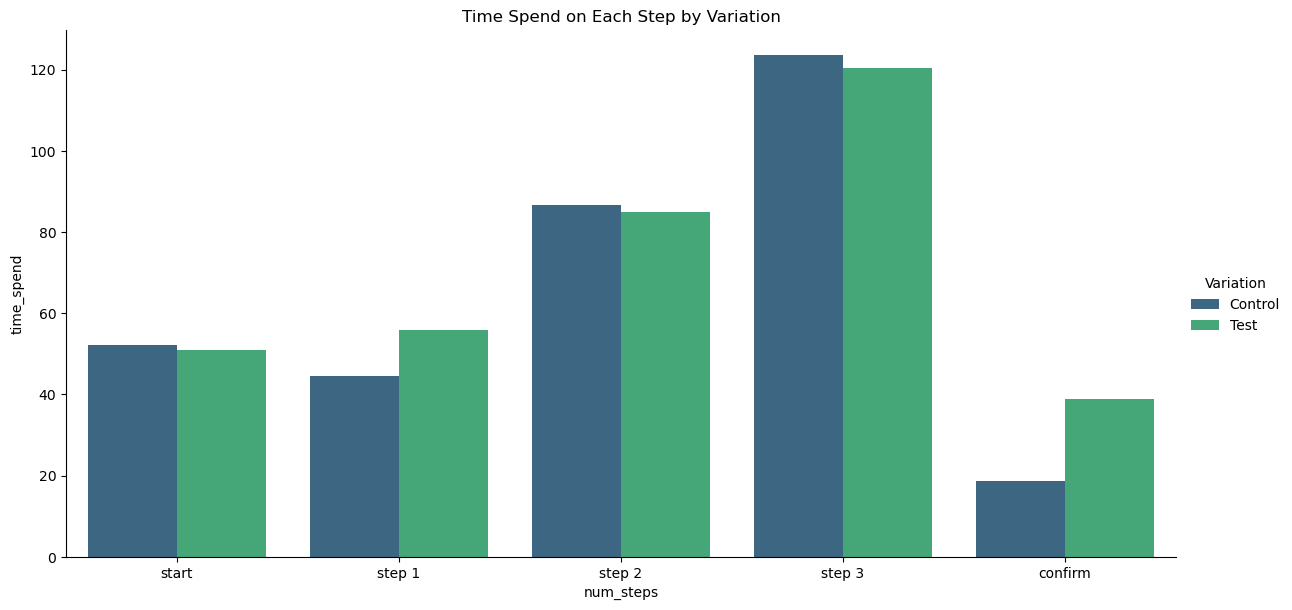

In [180]:
# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='time_spend', hue='Variation', data=df_web_data_grouped, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Time Spend on Each Step by Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()


# Mark the error

In [191]:
# add the error column to the data
df_web_data['error'] = np.where((df_web_data['visit_id'] == df_web_data['visit_id'].shift(1)) & (df_web_data['num_steps'] <= df_web_data['num_steps'].shift(1)), 'error', 'nan')

In [192]:
# checking this id and sort it by date_time 
df_web_data[df_web_data['client_id'] == 9988021]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps,time_diff,error,time_spend
316808,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 16:57:27,Test,0,0.0,nan,2230.0
316809,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:34:37,Test,0,2230.0,error,961.0
316810,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:50:38,Test,0,961.0,error,961.0
316811,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:06:39,Test,0,961.0,error,961.0
316812,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:22:40,Test,0,961.0,error,962.0
316813,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:38:42,Test,0,962.0,error,961.0
316814,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:54:43,Test,0,961.0,error,0.0
316815,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test,0,0.0,nan,39.0
316816,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test,1,39.0,nan,14.0
316817,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test,2,14.0,nan,49.0


In [193]:
pd.set_option('display.max_rows', 120)
df_web_data[df_web_data['client_id'] == 5595824]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps,time_diff,error,time_spend
176568,5595824,848154146_68023443838,730381080_95887868581_608672,start,2017-03-29 06:29:19,Test,0,0.0,nan,30.0
176569,5595824,848154146_68023443838,730381080_95887868581_608672,step_1,2017-03-29 06:29:49,Test,1,30.0,nan,44.0
176570,5595824,848154146_68023443838,730381080_95887868581_608672,step_2,2017-03-29 06:30:33,Test,2,44.0,nan,35.0
176571,5595824,848154146_68023443838,730381080_95887868581_608672,step_1,2017-03-29 06:31:08,Test,1,35.0,error,83.0
176572,5595824,848154146_68023443838,730381080_95887868581_608672,step_2,2017-03-29 06:32:31,Test,2,83.0,nan,58.0
176573,5595824,848154146_68023443838,730381080_95887868581_608672,step_3,2017-03-29 06:33:29,Test,3,58.0,nan,162.0
176574,5595824,848154146_68023443838,730381080_95887868581_608672,start,2017-03-29 06:36:11,Test,0,162.0,error,0.0
176575,5595824,848154146_68023443838,311825705_77653411711_713218,start,2017-03-30 06:09:27,Test,0,0.0,nan,10.0
176576,5595824,848154146_68023443838,311825705_77653411711_713218,step_1,2017-03-30 06:09:37,Test,1,10.0,nan,30.0
176577,5595824,848154146_68023443838,311825705_77653411711_713218,step_2,2017-03-30 06:10:07,Test,2,30.0,nan,61.0


<Axes: xlabel='error', ylabel='count'>

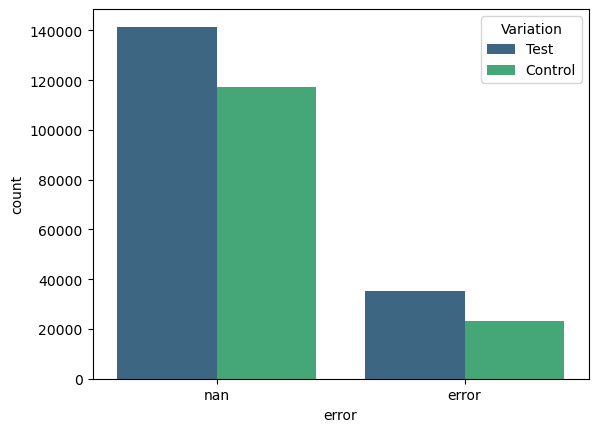

In [196]:
# show a countplot of the error column by variation
sns.countplot(x='error', data=df_web_data, hue='Variation', palette='viridis')

In [198]:
# show error by num_steps and variation
df_web_data_error = df_web_data[df_web_data['error'] == 'error']
df_web_data_error_grouped = df_web_data_error.groupby(['Variation', 'num_steps'])['error'].count().reset_index()
df_web_data_error_grouped

,Variation,num_steps,error
0,Control,0,14438
1,Control,1,3489
2,Control,2,3201
3,Control,3,851
4,Control,4,1239
5,Test,0,22693
6,Test,1,4984
7,Test,2,2862
8,Test,3,898
9,Test,4,3784


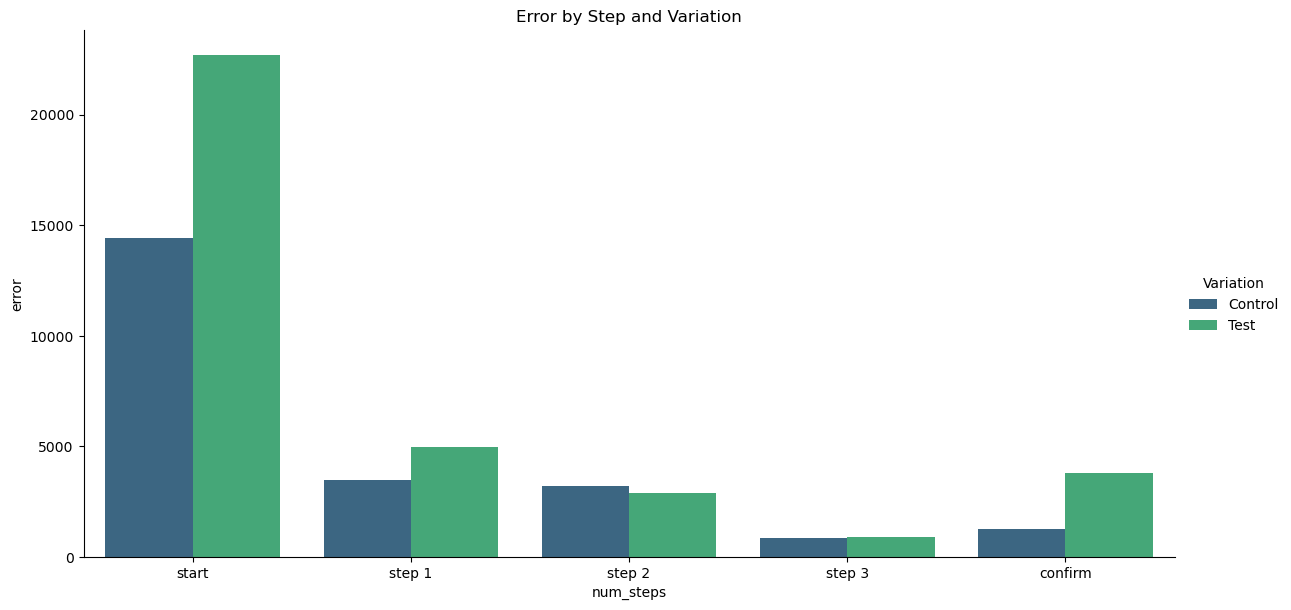

In [199]:
# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='error', hue='Variation', data=df_web_data_error_grouped, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Error by Step and Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()

In [ ]:
# create a new data frame to show the value count of client_id
df_client_id = df_web_data['client_id'].value_counts().reset_index().head(50)
df_client_id

In [ ]:
# group the data by client_id and variation ig client_id is in the top 50
df_web_data[df_web_data['client_id'].isin(df_client_id['client_id'])].groupby(['client_id', 'Variation']).size()



In [ ]:
# check how many unique client_id and group by variation
df_web_data.groupby('Variation')['client_id'].nunique()

# Caculate the completion rate by counting how many confirm by client_id

In [200]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation,num_steps,time_diff,error,time_spend
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0,0.0,nan,7.0
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1,7.0,nan,32.0
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2,32.0,nan,99.0
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3,99.0,nan,20.0
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4,20.0,nan,0.0
...,...,...,...,...,...,...,...,...,...,...
317230,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2,10.0,nan,39.0
317231,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3,39.0,nan,21.0
317232,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4,21.0,nan,0.0
317233,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0,0.0,nan,8.0


In [201]:
# counting num_steps 4 by client id and variation to a dataframe
completion_rate_table = df_web_data[df_web_data['num_steps'] == 4].groupby(['client_id', 'Variation']).size().reset_index()

completion_rate_table


,client_id,Variation,0
0,555,Test,1
1,647,Test,1
2,1195,Control,1
3,1197,Control,1
4,1336,Test,3
...,...,...,...
34116,9998851,Test,1
34117,9998964,Test,1
34118,9999009,Test,1
34119,9999400,Test,1


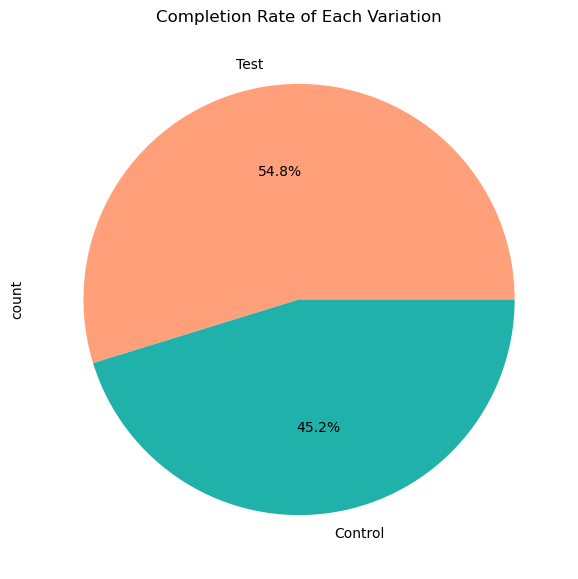

In [202]:
# create a pie chart to show the completion rate of each variation
plt.figure(figsize=(10, 7))
completion_rate_table['Variation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Completion Rate of Each Variation')
plt.show()